In [3]:
%%time
import time
import numpy as np
import pandas as pd

Wall time: 0 ns


#### Problem 
    - 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리시오.

In [2]:
# 타이타닉 데이터 가져오기

In [2]:
df = pd.read_csv('train.csv')
df.loc[800:810]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
800,801,0,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.00,0,0,347089,6.9750,NaN,S
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.00,0,0,347063,7.7750,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.00,0,0,347087,7.7750,NaN,S
808,809,0,2,"Meyer, Mr. August",male,39.00,0,0,248723,13.0000,NaN,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.00,1,0,113806,53.1000,E8,S


In [4]:
# ["Survived", "Age"] 컬럼을 titanic_df 데이터 프레임을 만들고,
# # Age가 NaN인 row 데이터를 삭제하시오.
titanic_df = pd.DataFrame(df, columns=['Survived', 'Age'])
titanic_df.dropna(inplace=True)
titanic_df

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0
10,1,4.0


In [5]:
# Ages 컬럼을 만들고 Age 컬럼에는 연령대에 대한 데이터 삽입
titanic_df['Ages'] = titanic_df['Age'] - titanic_df['Age'] % 10
titanic_df.head(5)

,Survived,Age,Ages
0,0,22.0,20.0
1,1,38.0,30.0
2,1,26.0,20.0
3,1,35.0,30.0
4,0,35.0,30.0


In [131]:
# 연령대별로 생존률

In [6]:
titanic_df['Count'] = 1
titanic_df.tail()

,Survived,Age,Ages,Count
885,0,39.0,30.0,1
886,0,27.0,20.0,1
887,1,19.0,10.0,1
889,1,26.0,20.0,1
890,0,32.0,30.0,1


In [7]:
titanic_df1 = titanic_df.pivot_table(values='Count', index='Ages', columns='Survived', aggfunc=np.sum)
titanic_df1

Survived,0,1
Ages,,
0.0,24.0,38.0
10.0,61.0,41.0
20.0,143.0,77.0
30.0,94.0,73.0
40.0,55.0,34.0
50.0,28.0,20.0
60.0,13.0,6.0
70.0,6.0,NaN
80.0,NaN,1.0


In [8]:
titanic_df1['survived_rate'] = round(titanic_df1[1] / (titanic_df1[0] + titanic_df1[1]) * 100, 2)
titanic_df1

Survived,0,1,survived_rate
Ages,,,
0.0,24.0,38.0,61.29
10.0,61.0,41.0,40.20
20.0,143.0,77.0,35.00
30.0,94.0,73.0,43.71
40.0,55.0,34.0,38.20
50.0,28.0,20.0,41.67
60.0,13.0,6.0,31.58
70.0,6.0,NaN,NaN
80.0,NaN,1.0,NaN


In [9]:
# Nan 값 제거
titanic_df1 = titanic_df1.dropna()
titanic_df1

Survived,0,1,survived_rate
Ages,,,
0.0,24.0,38.0,61.29
10.0,61.0,41.0,40.20
20.0,143.0,77.0,35.00
30.0,94.0,73.0,43.71
40.0,55.0,34.0,38.20
50.0,28.0,20.0,41.67
60.0,13.0,6.0,31.58


In [10]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기
# 0 => non_survived, 1 => survived, survived_rate
titanic_df1.rename(columns={0:'non_survived', 1: 'survived'}, inplace=True)
titanic_df1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Survived,non_survived,survived,survived_rate
Ages,,,
0.0,24.0,38.0,61.29
10.0,61.0,41.0,40.20
20.0,143.0,77.0,35.00
30.0,94.0,73.0,43.71
40.0,55.0,34.0,38.20
50.0,28.0,20.0,41.67
60.0,13.0,6.0,31.58


In [24]:
titanic_df1.columns

Index(['non_survived', 'survived', 'survived_rate'], dtype='object', name='Survived')

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


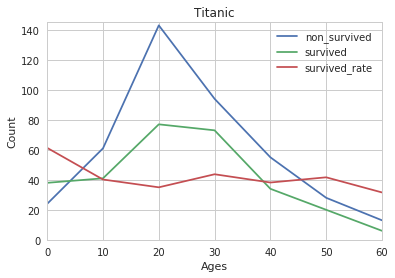

In [29]:
plt.xlim(0, 60)
plt.ylim(0, 145)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Titanic')
plt.plot(titanic_df1['non_survived'], label='non_survived')
plt.plot(titanic_df1['survived'], label='survived')
plt.plot(titanic_df1['survived_rate'], label='survived_rate')
plt.legend(loc=0)
plt.show()